# Background

The disaster of the RMS Titanic was one of the worst shipwrecks in history and certainly the most famous one. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and lead to better safety regulations for ships.

# Objective
    
* Explore the dataset, extract important information
* Perform Exploratory Data Analysis
* Pre-process Data
* Build a model(s) for classification
* Evaluate the model 


    

# Dataset

#### titanic.csv - Contains information of 891 passengers aboard the RMS Titanic

* pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* passengerid - Passenger unique ID
* survived - If the passenger survived or not (1-yes, 0-no)
* sex - Sex
* age - Age
* sibsp - Number of siblings/spouses aboard
* parch - Number of parents/children aboard
* fare - Passenger Fare
* embarked - Port of Embarkation (S - Southampton, C - Cherbourg, Q - Queenstown)
* class - Same as pclass
* who - if the passengers is a Man, a Woman or a Child
* adult_male - If the passenger is Adult Male or not (Bool)
* deck - Deck Letter
* embark_town - Same as embarked (full names of towns instead of first letters)
* alive - Same as survived (Bool)
* alone - If the passenger is alone or not (Bool)




### Importing the neccessary packages


In [601]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns

### Reading the dataset


In [602]:

dataset = pd.read_csv('titanic.csv')


### First 5 rows of the dataset


In [603]:
dataset.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Initial modification of features

In [604]:
dataset['family_size'] = dataset['sibsp'] + dataset['parch']

In [605]:
dataset.drop(['class','embarked','alive','passengerid','sibsp','parch'], inplace = True, axis=1)

* Combined sibsp and parch columns into one family_size column
* Dropped 'class', 'embarked' and 'alive' which were the duplicates of 'pclass', 'embark_town' and 'survived' respectively.
* Dropped passengerid which is a unique identifier and most likely has no correlation with survival

### Last 5 rows of the dataset 

In [606]:
dataset.tail()

,survived,pclass,sex,age,fare,who,adult_male,deck,embark_town,alone,family_size
886,0,2,male,27.0,13.00,man,True,NaN,Southampton,True,0
887,1,1,female,19.0,30.00,woman,False,B,Southampton,True,0
888,0,3,female,NaN,23.45,woman,False,NaN,Southampton,False,3
889,1,1,male,26.0,30.00,man,True,C,Cherbourg,True,0
890,0,3,male,32.0,7.75,man,True,NaN,Queenstown,True,0


### The shape of the data


In [607]:
dataset.shape

(891, 11)

* 891 samples, 11 features


### Checking the data types of the features

In [608]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   fare         891 non-null    float64
 5   who          891 non-null    object 
 6   adult_male   891 non-null    bool   
 7   deck         203 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
 10  family_size  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 64.5+ KB


* We have 177 missing values in age column and 688 in deck column
* Most of the data types are integers and objects that represent categories
* Target variable is 'survived' which is of an integer data type

### Changing data types for categorical variables

In [609]:
dataset[['survived','pclass','sex','who','adult_male','deck','embark_town','alone']] = dataset[['survived','pclass','sex','who','adult_male','deck','embark_town','alone']].astype("category")

## Train-Test Split

It is better to do train test split before EDA because we don't want to know anything about test data.

In [610]:
X_train, X_test = train_test_split(dataset,test_size = 0.2, random_state=2)

X_train.reset_index(drop=True, inplace = True)
X_test.reset_index(drop=True, inplace = True)

* 80% of the data is for training, 20% for testing

## EDA (Exploratory Data Analysis)

In [611]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    category
 1   pclass       712 non-null    category
 2   sex          712 non-null    category
 3   age          564 non-null    float64 
 4   fare         712 non-null    float64 
 5   who          712 non-null    category
 6   adult_male   712 non-null    category
 7   deck         159 non-null    category
 8   embark_town  710 non-null    category
 9   alone        712 non-null    category
 10  family_size  712 non-null    int64   
dtypes: category(8), float64(2), int64(1)
memory usage: 23.6 KB


* 'survived','pclass','sex','family_size','who','adult_male','deck','embark_town' and 'alone' were converted into categorical variables
* The memory usage was decreased from 64.5+ KB to 23.6 KB


### Getting the summary statistics for the continuous features

In [612]:
X_train.describe(include=['float64', 'int64'])

,age,fare,family_size
count,564.000000,712.000000,712.000000
mean,29.785904,32.289056,0.932584
std,14.295087,48.664636,1.653860
min,0.420000,0.000000,0.000000
25%,21.000000,7.895800,0.000000
50%,28.750000,14.458300,0.000000
75%,38.250000,31.068750,1.000000
max,71.000000,512.329200,10.000000


* All continuous variables are right skewed as the mean > 50th percentile

In [613]:
X_train.describe(include=["category"])

,survived,pclass,sex,who,adult_male,deck,embark_town,alone
count,712,712,712,712,712,159,710,712
unique,2,3,2,3,2,7,3,2
top,0,3,male,man,True,C,Southampton,True
freq,449,389,459,428,428,46,498,429


* We have an imbalanced dataset with 449(63%) survived and 263(37%) not survived
* Most passenges are third-class(3) passengers from 1-3 classes (389)
* Most of the passengers(459) were male
* Most of the passengers were adult male(428) we also get that there were 31 (459-428) male children
* Most of the passengers(46) were at deck lettered C 
* Most of the passengers(498) embarked from Southampton town
* Most of the passengers(429) were alone in the ship

### Handling Missing Values

###### Deck column

For the 'deck' column it is better to create another category for unknown deck, which will most likely give more information than if we deleted it

In [614]:
X_train['deck'] = X_train['deck'].cat.add_categories('U')
X_train['deck'].fillna('U', inplace= True)  

<ipython-input-614-2a4436d745ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['deck'] = X_train['deck'].cat.add_categories('U')
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


* Filling NaN values of deck column with 'U' as Unknown deck 

In [615]:
X_train['deck'].value_counts()

U    553
C     46
B     41
D     26
E     25
A     11
F      8
G      2
Name: deck, dtype: int64

##### Age column

Age is continuous variable, so let's first understand the data


In [616]:
X_train[X_train['age'].isna()].sample(5)

,survived,pclass,sex,age,fare,who,adult_male,deck,embark_town,alone,family_size
110,0,3,male,NaN,25.4667,man,True,U,Southampton,False,4
215,0,3,female,NaN,25.4667,woman,False,U,Southampton,False,4
501,0,3,female,NaN,15.2458,woman,False,U,Cherbourg,False,2
95,0,3,male,NaN,19.9667,man,True,U,Southampton,False,1
249,0,3,male,NaN,7.7500,man,True,U,Queenstown,True,0


We can assume that age is NaN where the deck is U and check if it is correct or not


In [617]:
X_train[X_train['age'].isna()]['deck'].value_counts()

U    133
C      7
A      2
B      2
E      2
D      1
F      1
G      0
Name: deck, dtype: int64

* We can see that there is no strong correlation between NaN values of 'age' and Unknown decks

Check how many children and adult there are in 714 samples

In [618]:
bins= [0,18,1000]
labels = ['Children','Adult']
pd.cut(X_train['age'], bins=bins, labels=labels, right=False).value_counts()

Adult       473
Children     91
Name: age, dtype: int64

* 473 adult, 91 children

Better to do deeper analysis to get better intuition of how to input missing values of age column

## Univariate Analysis

In [619]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  

### Age column


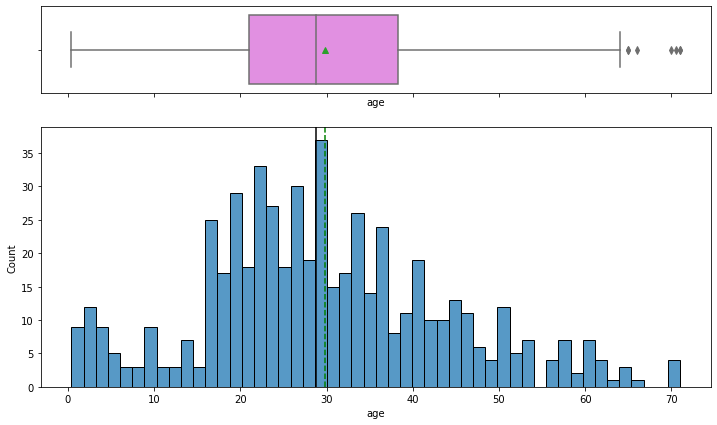

In [620]:
histogram_boxplot(X_train, 'age', bins = 50)

* Right skewed, several outliers which we can treat

### Fare column

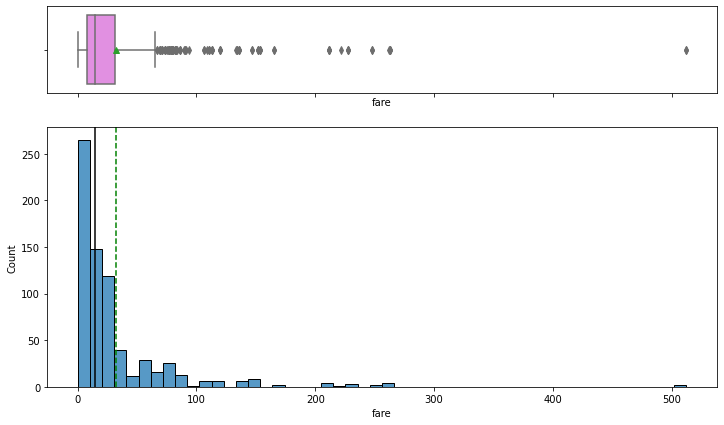

In [621]:
histogram_boxplot(X_train, 'fare', bins = 50)

* Right skewed, there are clear outliers, like a person that spent about 500, which need to be treated
* Most of the passengers don't spend much on board

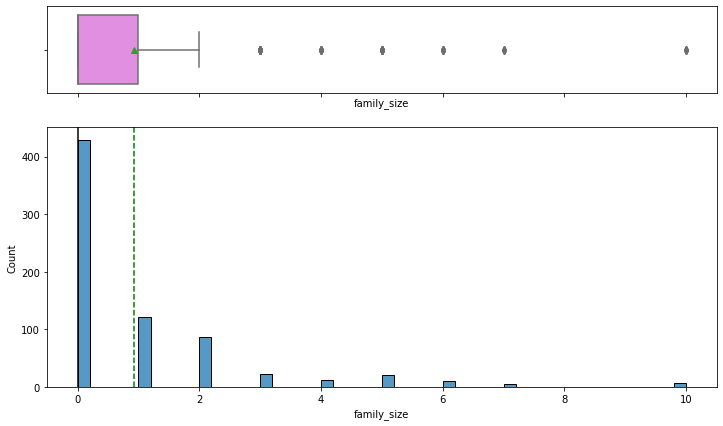

In [622]:
histogram_boxplot(X_train, 'family_size', bins = 50)

* Outliers present

In [623]:
def labeled_barplot(data, feature, perc=False, n=None):
    
    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show() 

### Survived column (Target Variable)

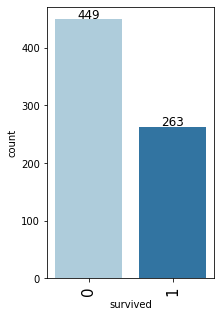

In [624]:
labeled_barplot(X_train, 'survived')

* Imbalanced dataset as mentioned above 63% - 0, 37% - 1

### Passenger class column

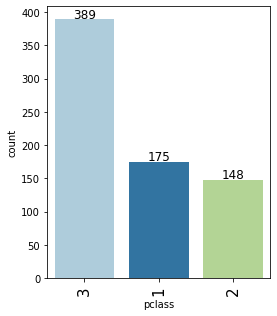

In [543]:
labeled_barplot(X_train, 'pclass')

* Most passengers are from the third class, first and second classes are approximately even
* It was expected from the fare of the passengers, third-class passengers don't spend much

### Embark Town column

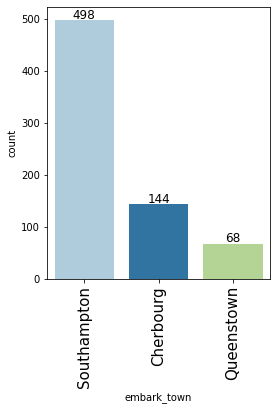

In [544]:
labeled_barplot(X_train, 'embark_town')

* Most of the passengers were embarked from town Southampton (498)

### Sex column

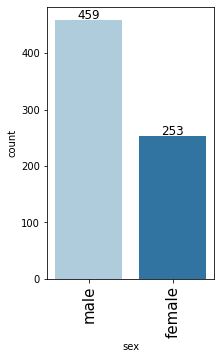

In [545]:
labeled_barplot(X_train, 'sex')

* Most of the passengers are male (about 64.5%)

### Family Size column

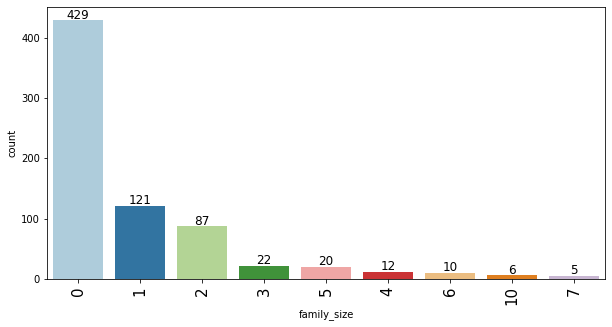

In [546]:
labeled_barplot(X_train, 'family_size')

* Most of the passengers(429) were alone on the board

### Who column

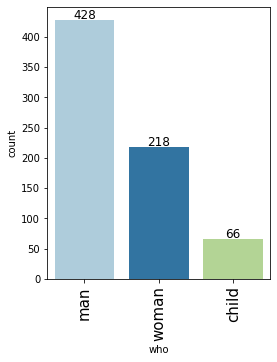

In [547]:
labeled_barplot(X_train, 'who')

In [548]:
(X_train['age'] < 18).value_counts()

False    621
True      91
Name: age, dtype: int64

* This observation brings a contradiction. One column says there were 66 children, the other one says there were 91 (assuming child is <18). Works fine if we consider child is <16

### Adult_male column

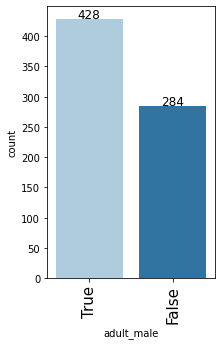

In [549]:
labeled_barplot(X_train, 'adult_male')

* 428 passengers are male adults which is the same as the man category of who variable

## Bivariate Analysis

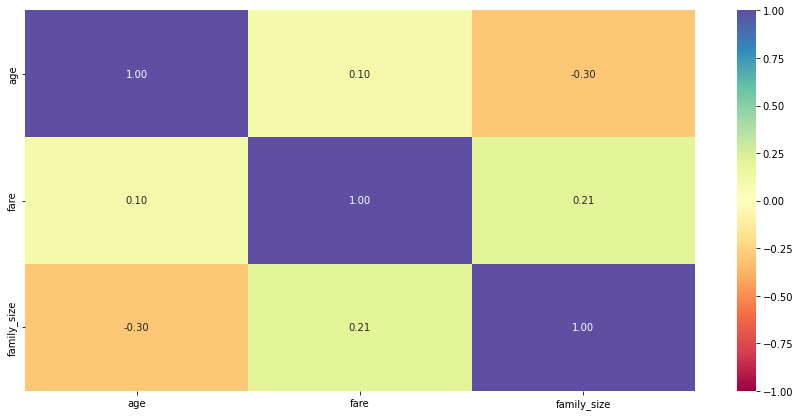

In [550]:
plt.figure(figsize=(15, 7))
sns.heatmap(X_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* No significant correlation between columns 

In [625]:
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Survived vs Pclass

survived    0    1  All
pclass                 
All       449  263  712
1          69  106  175
3         299   90  389
2          81   67  148
------------------------------------------------------------------------------------------------------------------------


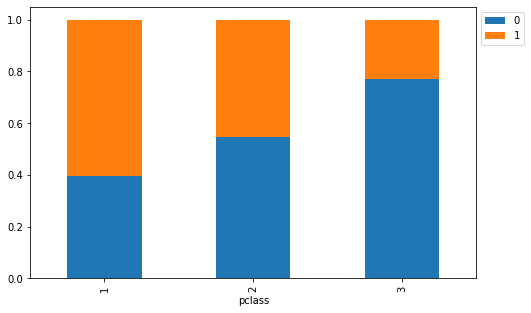

In [626]:
stacked_barplot(X_train, 'pclass', 'survived')

* The observations show that most of the first-class passengers died and about half of the second-class also died. Third-class passengers had better survival rate

### Survived vs Sex

survived    0    1  All
sex                    
All       449  263  712
female     69  184  253
male      380   79  459
------------------------------------------------------------------------------------------------------------------------


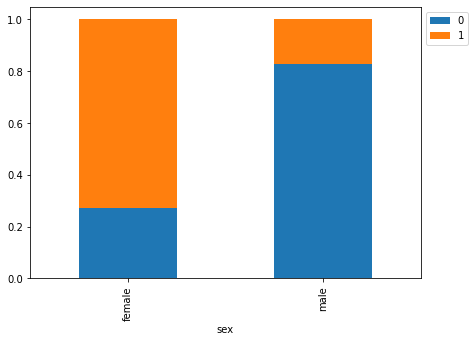

In [627]:
stacked_barplot(X_train, 'sex', 'survived')

* Most of the female passengers died, male passengers had better survival rate

### Survived vs Family Size

survived       0    1  All
family_size               
All          449  263  712
0            305  124  429
1             53   68  121
2             38   49   87
3              8   14   22
5             17    3   20
6              7    3   10
4             10    2   12
7              5    0    5
10             6    0    6
------------------------------------------------------------------------------------------------------------------------


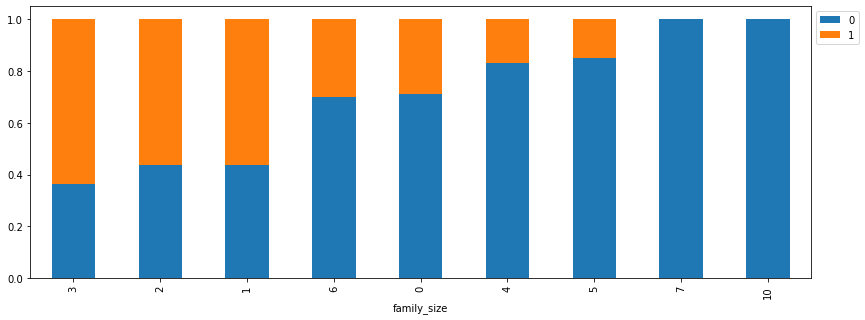

In [628]:
stacked_barplot(X_train, 'family_size', 'survived')

* Families with 1-3 people had the worst survival rate

### Survived vs Deck

survived    0    1  All
deck                   
All       449  263  712
U         392  161  553
B          12   29   41
C          18   28   46
D           8   18   26
E           7   18   25
A           7    4   11
F           5    3    8
G           0    2    2
------------------------------------------------------------------------------------------------------------------------


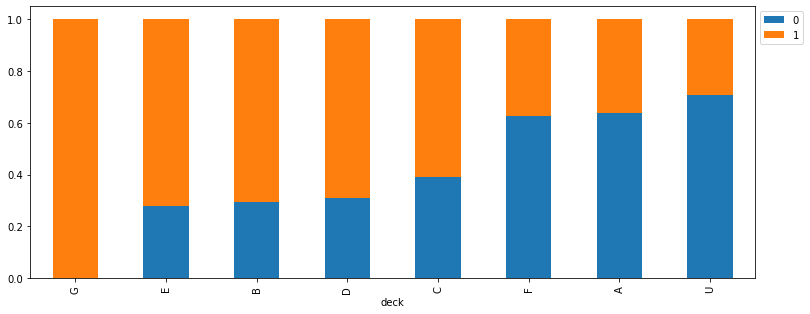

In [629]:
stacked_barplot(X_train, 'deck', 'survived')

* Most of the passengers with unknown deck survived. 2 passengers were from G deck and both died. D,E,B decks are also dangerous.

### Survived vs Embark Town

survived       0    1  All
embark_town               
All          449  261  710
Southampton  336  162  498
Cherbourg     70   74  144
Queenstown    43   25   68
------------------------------------------------------------------------------------------------------------------------


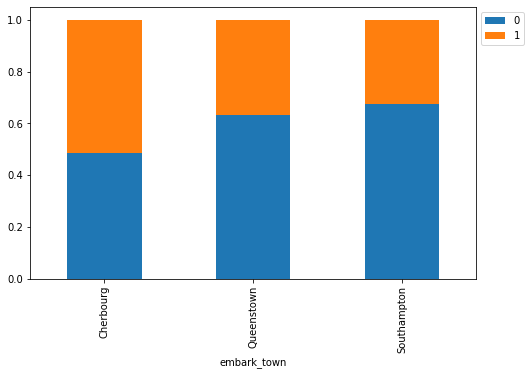

In [630]:
stacked_barplot(X_train, 'embark_town', 'survived')

* Most deaths were in Cherbourg embarkation case, but it doesn't vary much from other towns. Most likely this feature won't have much importance

## Summary of EDA

#### Data Description:

* Target variable is survived column which is of categorical data type
* age, fare and newly created family_size are continuous variables while others are of categorical type
* There are 177 missing values in age column and 688 in deck column
* Target variable is imbalanced(63% and 37%)

#### Observations from EDA:

* pclass - Most passengers are from the third class, first and second classes are approximately evenly distributed
* sex - Most of the passengers are male (about 64.5%)
* age - Mean is bigger than 50th percentile, which indicates that it is right skewed. There are several outliers that have to be treated. Moreover, there are also missing values that will be filled after outlier handling.
* family_size - Most passengers were alone on board. It is right skewed and has outliers.
* fare - Feature is right skewed, has several outliers that spent far mor than others that need to be treated.
* who - A feature that combines age and sex columns and assumes that children are smaller than 16 years old. Shows that most of the passengers were men.
* adult_male - Shows that most of the passengers were adult males.
* deck - Most of the observations were unknown (553), which were replaced with unknown value.
* embark_town - Most of the passengers were embarked from town Southampton (498)
* alone - Shows that most of the passengers were alone. It captures similar information as family_size.
* No significant correlation between continuous variables
* survived vs pclass - Third-class passengers had better survival rate compared to first- and second-class.
* survived vs sex - Male passengers had better survival rate compared to female passengers.
* survived vs family_size - Passengers with family size 1-3 had worst survival rate
* survived vs deck - Passengers that had unknown deck had better survive rate. The worst survival rate had decks lettered G,D,E,B
* survived vs embark_town - Survival rates for different towns are approximately equal. Most likely it won't give us much information during training

#### Data Pre-Processing Steps

* There are outliers to be treated
* Age column has missing values to be handled
* Several columns need to be dropped that provide same information as others
* Feature Scaling

## Data Preprocessing

### Outlier detection

['age', 'fare', 'family_size']


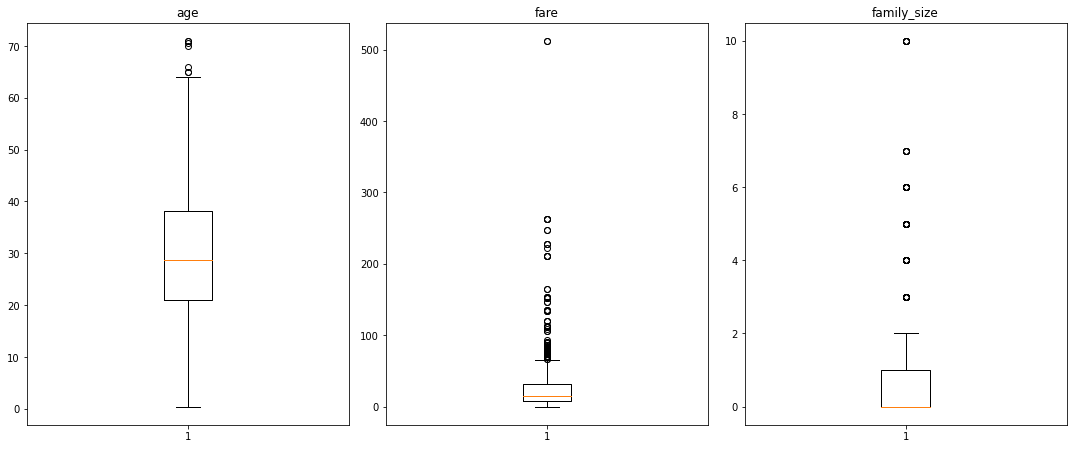

In [631]:
numerical_col = X_train.select_dtypes(include=np.number).columns.tolist()
print(numerical_col)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_train[variable].dropna(), whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Treating Outliers

In [642]:
def treat_outliers(df, col):

    Q1 = df[col].quantile(0.25)  # Lower whisker
    Q3 = df[col].quantile(0.75)  # Upper whisker
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower Whisker will be assigned the value of Lower Whisker
    # all the values greater than Upper Whisker will be assigned the value of Upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):

    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [633]:
numerical_col = X_train.select_dtypes(include=np.number).columns.tolist()
X_train = treat_outliers_all(X_train, numerical_col)

<ipython-input-632-ccaa1409a64e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)


### Ploting the results

['age', 'fare', 'family_size']


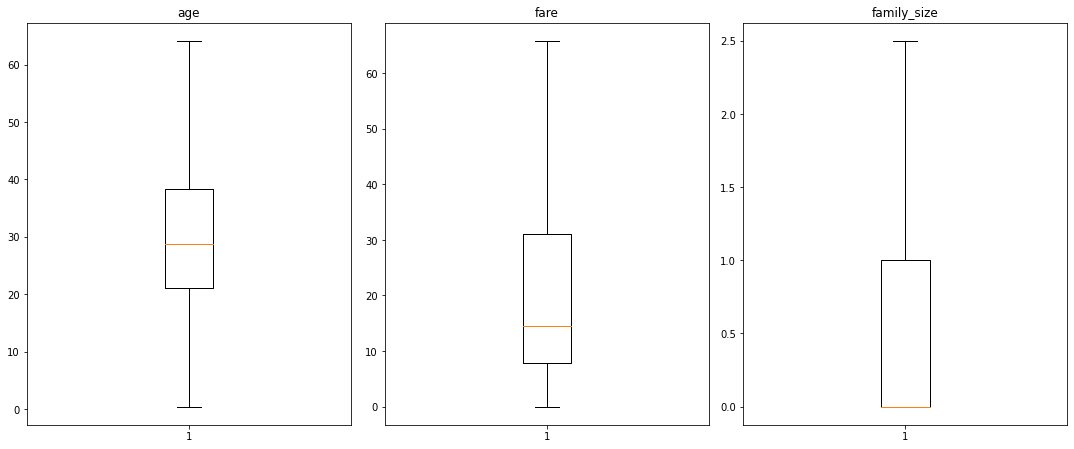

In [634]:
numerical_col = X_train.select_dtypes(include=np.number).columns.tolist()
print(numerical_col)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_train[variable].dropna(), whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Final missing value handling

Now, as we eliminated the outliers of age column we can freely input the missing values with the mean of the column

In [635]:
X_train['age'].fillna(X_train['age'].mean(), inplace=True)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


* Now as we have no outliers we could fill nan values of age column with its mean

### Deletion of similar features

In [636]:
X_train.drop(['alone','who', 'adult_male'], inplace = True, axis=1)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


* alone, who and adult_male columns capture similar information as family_size, age and sex respectively

### Dependent and independent variables split

In [637]:
y_train = X_train['survived']
X_train.drop('survived', inplace = True, axis = 1)

y_test = X_test['survived']
X_test.drop('survived', inplace = True, axis = 1)


* Seperated target variable from other features

### One-Hot Encoding of categorical variables

In [638]:
X_train = pd.get_dummies(X_train)

In [568]:
X_train

,age,fare,family_size,pclass_1,pclass_2,pclass_3,sex_female,sex_male,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_U,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,40.000000,27.720800,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,4.000000,16.700000,2.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
2,47.000000,9.000000,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,9.000000,31.387500,2.5,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
4,20.000000,9.845800,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,30.000000,8.662500,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
708,29.733378,8.712500,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
709,64.125000,49.504200,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
710,29.733378,65.828175,0.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


### Applying data preprocessing to Test dataset

In [567]:
X_test['age'].fillna(X_train['age'].mean(), inplace=True)
X_test['embark_town'].fillna('Southampton',inplace=True)
X_test['deck'] = X_test['deck'].cat.add_categories('U')
X_test['deck'].fillna('U', inplace= True)  
X_test.drop(['alone','who', 'adult_male'], inplace = True, axis=1)
X_test = pd.get_dummies(X_test)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-567-2ef9fd35abeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['deck'] = X_test['deck'].cat.add_categories('U')


* Preprocessing test dataset for the evaluation

### Feature Scaling - Standardization

In [570]:
StScaler = StandardScaler()

X_train.loc[:,['age','fare','family_size']] = StScaler.fit_transform(X_train.loc[:,['age','fare','family_size']])

X_test.loc[:,['age','fare','family_size']] = StScaler.transform(X_test.loc[:,['age','fare','family_size']])

In [571]:
X_train

,age,fare,family_size,pclass_1,pclass_2,pclass_3,sex_female,sex_male,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_U,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,8.155303e-01,0.170830,-0.731672,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,-2.044134e+00,-0.365282,1.427709,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
2,1.371576e+00,-0.739852,-0.731672,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,-1.646958e+00,0.349198,1.967554,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
4,-7.731719e-01,-0.698707,-0.731672,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2.117918e-02,-0.756270,-0.731672,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
708,2.822102e-16,-0.753837,-0.731672,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
709,2.731902e+00,1.230493,-0.731672,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
710,2.822102e-16,2.024580,-0.731672,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


## Building the Model

As predicting both cases is equally important we need to maximize f1 score. Greater f1 score indicates higher chances to predict both classes correctly. Moreover, the classes are imbalanced, so f1 score is the best metric for evaluating this problem.

Below is the evaluation function which will evaluate the model

In [572]:
def evaluation(true, predicted, algorithm):

    confmat = confusion_matrix(true, predicted)

    fig, ax = plt.subplots(figsize=(2.5,2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha = 0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j,y=i, s = confmat[i,j], va='center',ha='center')

    print("Confusion Matrix for " + algorithm)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()
    print(" ")
    print("F1 Score for " + algorithm + " - " + str(f1_score(true, predicted)))
    print(" ")
    print("Accuracy of " + algorithm + " model (test dataset) - " + str(accuracy_score(true, predicted)))
    print(" ")

### Logistic Regression

Confusion Matrix for Logistic Regression


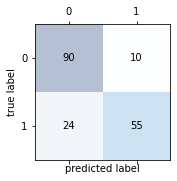

 
F1 Score for Logistic Regression - 0.763888888888889
 
Accuracy of Logistic Regression model (test dataset) - 0.8100558659217877
 


In [574]:
logReg = LogisticRegression(solver='liblinear', random_state = 1, C=1)
logReg.fit(X_train, y_train)
logReg_pred = logReg.predict(X_train)
logReg_pred_test = logReg.predict(X_test)

### Random Forest

Confusion Matrix for Random Forest


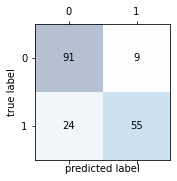

 
F1 Score for Random Forest - 0.7692307692307693
 
Accuracy of Random Forest model (test dataset) - 0.8156424581005587
 


In [575]:
rndForest = RandomForestClassifier(max_depth=10, random_state=1,n_estimators=100, criterion = 'entropy')
rndForest.fit(X_train,y_train)
rndPred = rndForest.predict(X_train)
rndPred_test = rndForest.predict(X_test)

## Evaluation of the models

Evaluating the models by F1 Score and Accuracy

#### Logistic Regression

Confusion Matrix for Logistic Regression


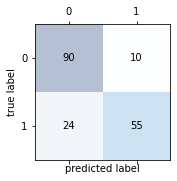

 
F1 Score for Logistic Regression - 0.763888888888889
 
Accuracy of Logistic Regression model (test dataset) - 0.8100558659217877
 


In [640]:
evaluation(y_test, logReg_pred_test, 'Logistic Regression')

#### Random Forest

Confusion Matrix for Random Forest


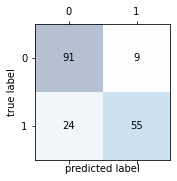

 
F1 Score for Random Forest - 0.7692307692307693
 
Accuracy of Random Forest model (test dataset) - 0.8156424581005587
 


In [641]:
evaluation(y_test, rndPred_test, 'Random Forest')

## Conclusion

* The initial data contained many missing values and needed much preprocessing. We removed unnecessary features, performed EDA to understand the data and fill in the missing values. Prepared the data for model training.
* Built Logistic Regression and Random Forest models that performed classification on the test data.
* Used F1 Score and Accuracy metrics to evaluate the models.
* The algorithms produced 80%+ accuracy and 76%+ f1 score.